In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ROOT
import my_library.thesis_plotter_library as plotter
import my_library.common_analysis_tools as ct

Welcome to JupyROOT 6.24/04


In [3]:
ROOT.gStyle.SetOptStat(0)

This notebook is used for plotting things for my thesis. The cooresponding library defines all the functions used in this notebook.

In [4]:
hist_ks_nocut, hist_ks_cut = plotter.get_ks_before_after_cut()

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ks_nocut.png has been created


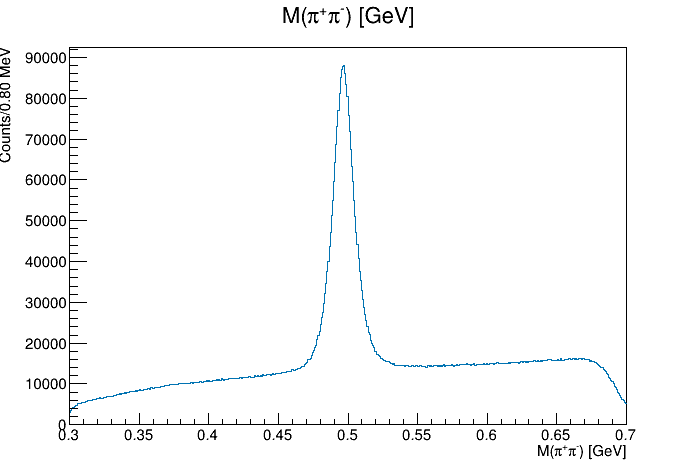

In [23]:
c = ROOT.TCanvas()
hist_ks_nocut.Draw()
c.Draw()
plotter.save_plot(c, 'ks_nocut')

In [6]:
hist_ks_pl = plotter.get_mpipi_vs_pathlength_sig()

input_line_145:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_146:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/pathlength_vs_mpipi.png has been created


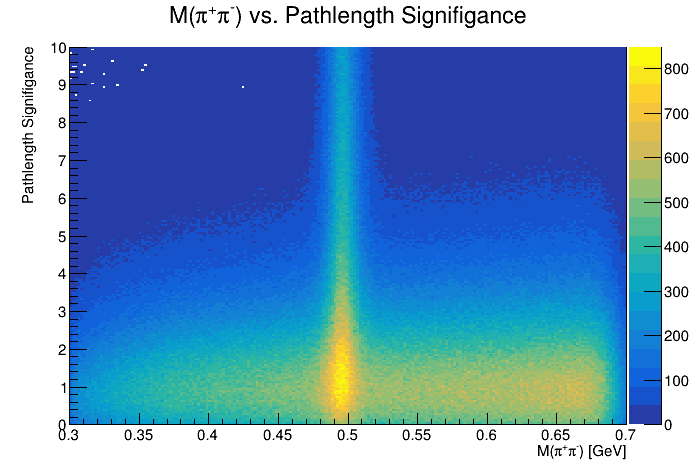

In [25]:
hist_ks_pl.Draw('colz')
c.Draw()
plotter.save_plot(c, 'pathlength_vs_mpipi')

building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ks_before_after_pl_cut.png has been created


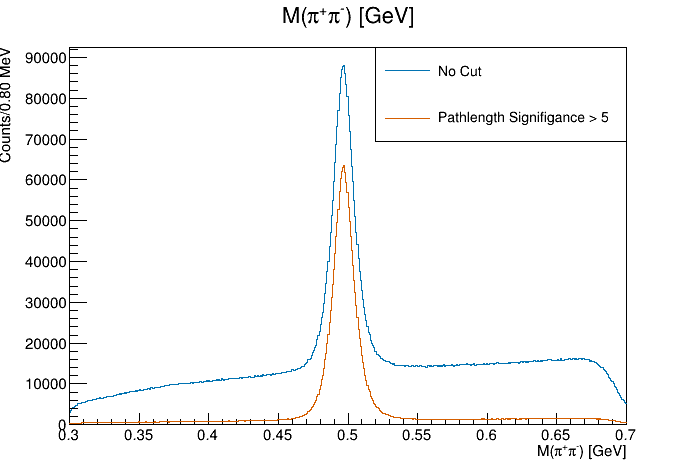

In [28]:
legend = plotter.build_legend([hist_ks_nocut, hist_ks_cut], x1 = 0.54, labels=['No Cut', 'Pathlength Signifigance > 5'])
hist_ks_nocut.Draw()
hist_ks_cut.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'ks_before_after_pl_cut')


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ks_after_pl_cut.png has been created


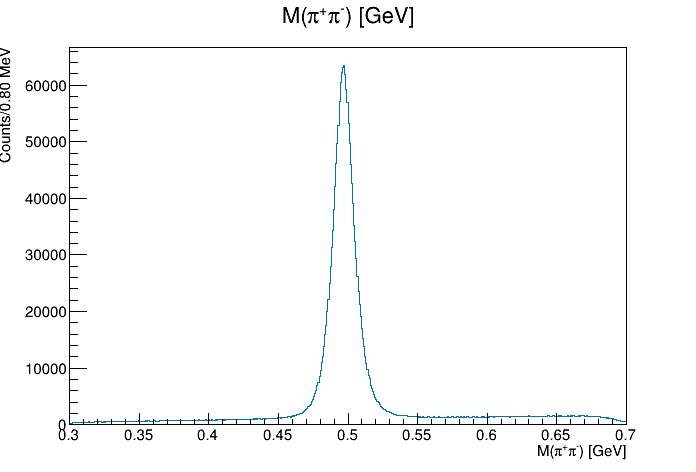

In [29]:
blue_hist_after = hist_ks_cut.Clone()
blue_hist_after.SetLineColor(ROOT.TColor.GetColor(ct.COLORBLIND_HEX_DICT['blue']))
blue_hist_after.Draw()
c.Draw()
plotter.save_plot(c, 'ks_after_pl_cut')

input_line_174:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_175:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^
Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/mx2_all_pipkmks.png has been created


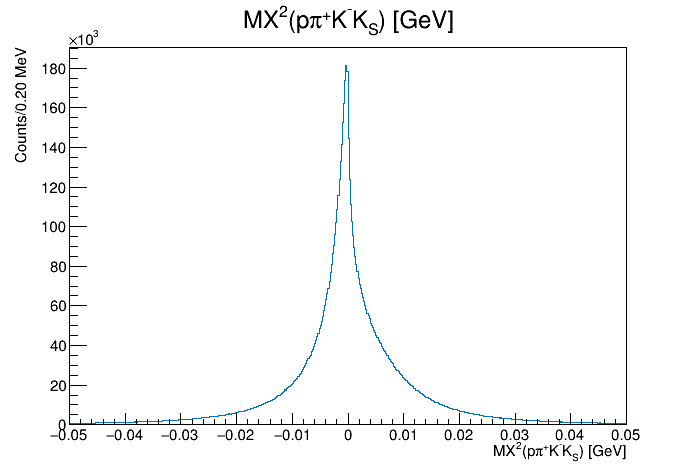

In [30]:
hist_mx2_all = plotter.plot_mx2_all()
hist_mx2_all.Draw()
c.Draw()
plotter.save_plot(c, 'mx2_all_pipkmks')

In [11]:
hist_tmand_before, hist_tmand_after = plotter.result_of_p_p_cut()

input_line_162:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_163:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^


building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/tmand_before_after_cut.png has been created


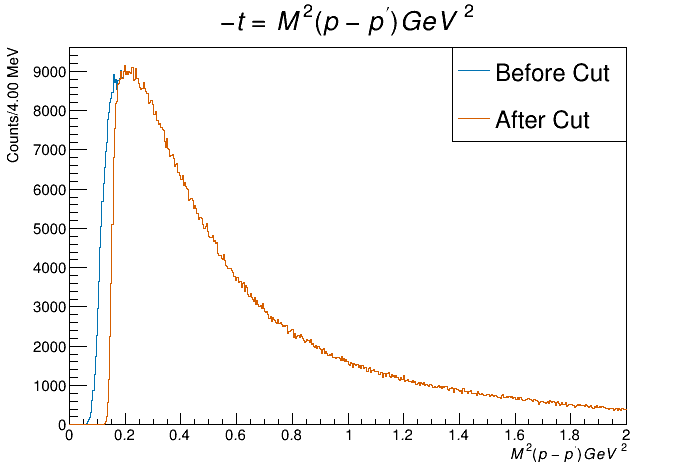

In [18]:
legend = plotter.build_legend([hist_tmand_before, hist_tmand_after], x1=0.65, labels=['Before Cut', 'After Cut'])
legend.SetTextSize(0.055)
hist_tmand_before.Draw()
hist_tmand_after.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'tmand_before_after_cut')

In [39]:
hist_delta, hist_nstar = plotter.plot_baryons()

input_line_199:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_200:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^
input_line_202:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_203:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^


building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/delta_nstar.png has been created


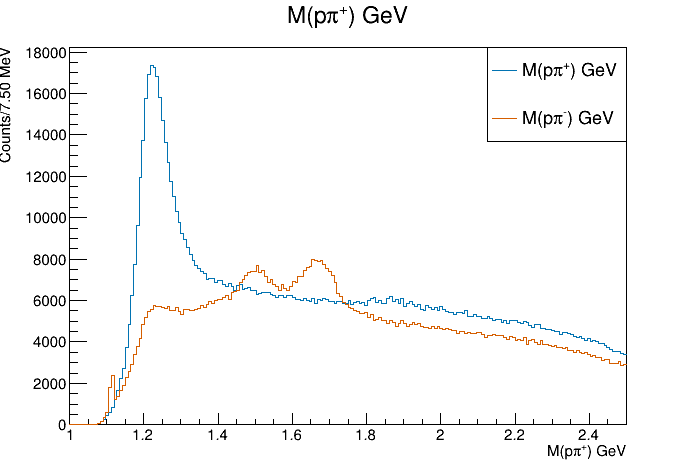

In [40]:
legend = plotter.build_legend([hist_delta, hist_nstar])
hist_delta.Draw()
hist_nstar.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'delta_nstar')